In [1]:
import pandas as pd #used to import in the data
import matplotlib.pyplot as plt #used for plotting of the dataset 
from matplotlib.image import imread

import numpy as np #used to handle the math in the project
import os
import utils

import tensorflow as tf #only used for tensorflow in this project was for display of data

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
import seaborn as sn

2023-06-22 18:22:21.413975: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 18:22:22.089462: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train_df=pd.read_csv('/media/yash/Data/kaggle_data/fake or real image/Dataset/train.csv')
test_df=pd.read_csv('/media/yash/Data/kaggle_data/fake or real image/Dataset/test.csv')

In [3]:
Train_image=train_df.drop('labels',axis ='columns')
Train_label=train_df['labels']    

In [4]:
smote = SMOTE(sampling_strategy='minority')
Train_image_sm, Train_label_sm=smote.fit_resample(Train_image,Train_label)

In [5]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Train_image_sm,Train_label_sm,test_size=0.3)

In [6]:
xg_model=XGBClassifier(n_estimators=1000)

In [7]:
xg_model.fit(Xtrain,Ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [8]:
predictions = xg_model.predict(Xtest)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, Ytest)))

Mean Absolute Error : 0.06493506493506493


              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1147
           1       0.95      0.92      0.93      1163

    accuracy                           0.94      2310
   macro avg       0.94      0.94      0.94      2310
weighted avg       0.94      0.94      0.94      2310



2023-06-22 18:23:43.255731: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-22 18:23:43.274536: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-22 18:23:43.274805: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Text(95.72222222222221, 0.5, 'Truth')

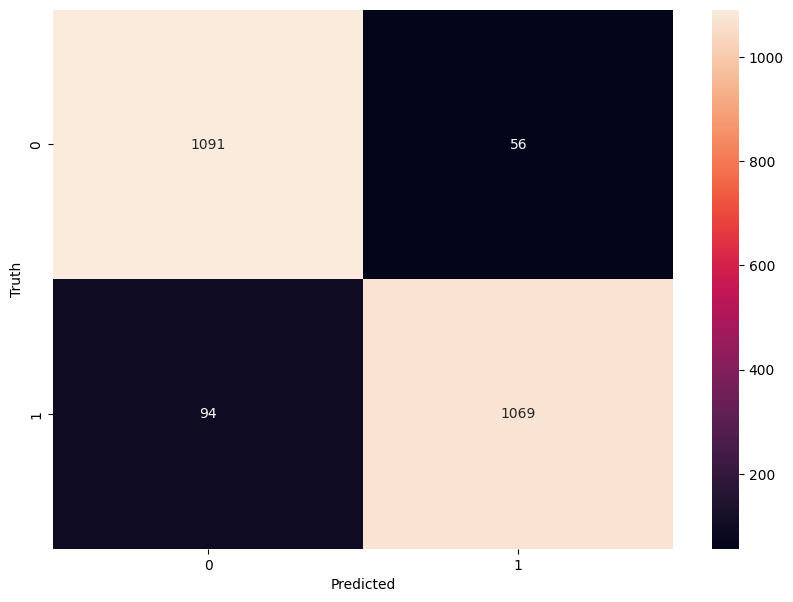

In [9]:
f1_score=(Ytest,predictions)
print(classification_report(Ytest,predictions))
cm =tf.math.confusion_matrix(labels=Ytest,predictions=predictions)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [10]:
test_df_d=test_df.drop('id',axis='columns')
test_df_d

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
0,-3.388242,0.868285,-0.427619,-0.678964,-1.625735,0.262761,1.243040,1.537751,-0.352028,-0.114245,...,-0.776403,-0.662884,-0.257091,-1.168413,0.223260,-0.482520,-0.085453,-0.382265,-0.539349,-1.682404
1,-0.496920,0.952381,0.989040,0.451422,0.513516,-0.099658,-1.124326,0.729430,-0.216224,-0.000680,...,0.379635,-1.760084,1.125450,-0.328047,-0.880305,-1.257607,0.964312,2.021104,0.655021,-0.423029
2,1.128369,-0.537951,2.544358,1.165254,-1.904994,0.776961,-0.495768,0.060111,-1.418468,-0.086128,...,1.165254,-1.373589,-0.483701,-0.964782,-0.869555,0.066040,-0.444567,-0.531935,-0.878660,1.099488
3,0.051253,1.746814,0.681177,1.844524,-0.327977,1.226839,-0.085519,0.379008,-1.003667,0.570237,...,-0.442288,-2.794472,-0.763468,-0.789832,-0.113209,-2.703150,-2.058728,1.070627,-0.458045,-0.435825
4,1.423209,-0.983594,-1.694170,1.197507,1.044211,0.518777,-0.298612,-0.365174,0.738447,0.054435,...,-2.624450,-3.200223,0.711422,-0.190394,0.337224,-1.656639,0.707360,-0.562290,1.471181,-0.192000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.889888,-0.319077,0.849589,0.822723,0.876455,0.325704,0.876455,-0.910127,0.889888,0.204808,...,0.889888,-2.226556,-0.090717,-1.393713,-0.896694,-0.399675,-0.856395,0.876455,0.863022,-0.601169
2246,1.005737,-0.064755,1.163494,1.163494,1.163494,0.724028,0.712760,-0.785929,-1.225394,1.107152,...,1.163494,-1.270468,-0.932417,-1.169053,-0.008414,-0.605636,-0.323927,1.163494,-1.315541,0.047928
2247,1.252086,1.223561,0.153859,-0.987156,0.239435,-0.003031,-1.158309,1.237823,-1.272410,0.767154,...,0.581740,-1.386512,0.809943,-1.243885,0.153859,-0.630589,1.594391,1.252086,-1.429300,1.408976
2248,1.042624,-0.129166,1.066538,1.030667,1.162195,0.707827,-1.396612,0.014319,-1.025944,0.982839,...,1.078495,-1.193343,0.086061,-0.081338,-0.978116,-0.368307,-0.129166,1.090452,-1.444440,0.468686


In [11]:
submission_pred=xg_model.predict(test_df_d)
submission_pred

array([1, 0, 0, ..., 1, 0, 1])

In [12]:
submission_data=pd.DataFrame({'id':test_df['id'],'Prediciton':submission_pred})
submission_data

,id,Prediciton
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0


In [13]:
submission_data.to_csv('/home/yash/Data/kaggle_data/submission/ai_image/submission_xg.csv',index=False)

In [14]:
read_sub=pd.read_csv('/home/yash/Data/kaggle_data/submission/ai_image/submission1.csv')
read_sub

,id,Prediciton
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
2245,2246,0
2246,2247,0
2247,2248,1
2248,2249,0
